In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import cv2

In [2]:
%matplotlib qt

# Load some samples

In [3]:
DEBUG_PATH = '../data/CV_debug/'
DATA_PATH = '../data/brain_images/'

subjects = [i for i in os.listdir(DEBUG_PATH) if i.find('.')==-1]



In [4]:
subjects

['TCGA_HT_7690_19960312', 'TCGA_DU_6407_19860514']

/home/dmitriishubin/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


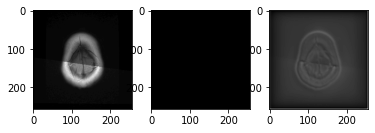

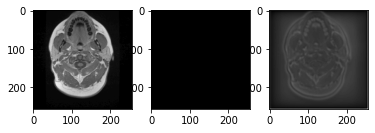

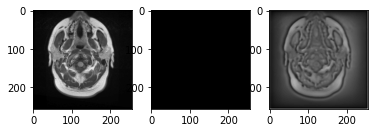

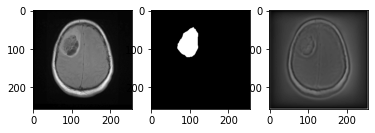

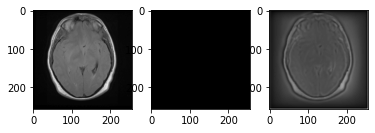

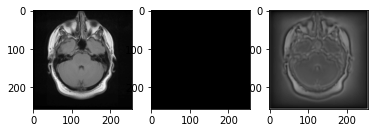

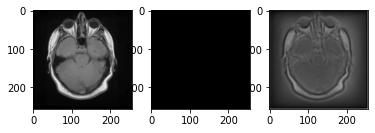

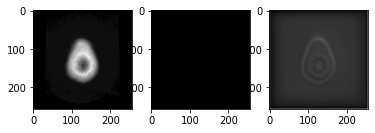

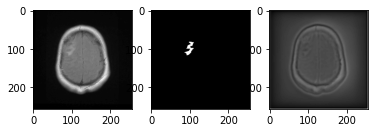

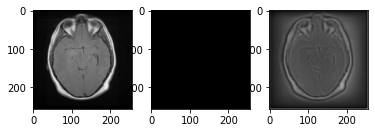

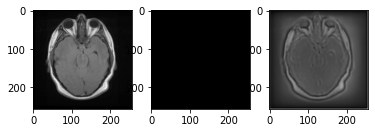

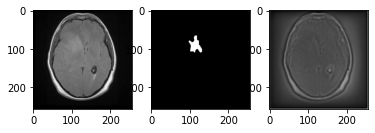

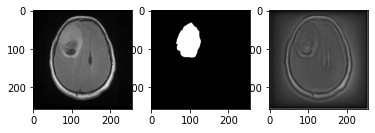

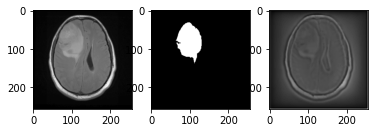

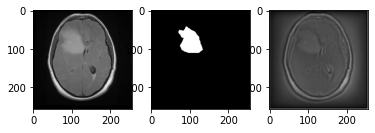

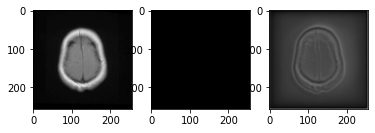

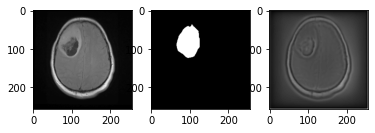

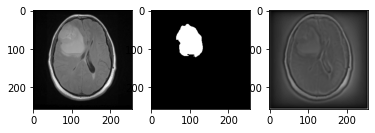

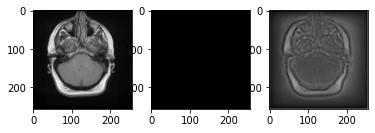

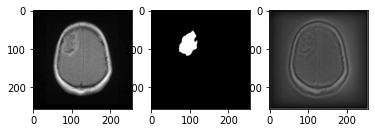

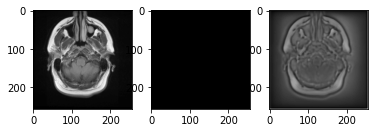

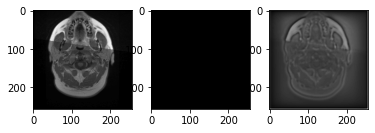

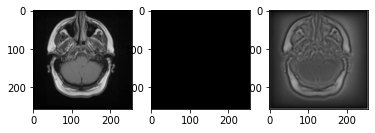

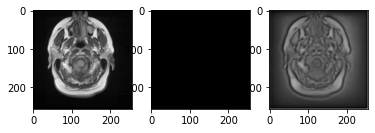

In [9]:
subject = subjects[0]

images = [i[:-5] for i in os.listdir(DEBUG_PATH+subject) if i.find('.json')!=-1]
for image in images:
    
    mask=cv2.imread(DATA_PATH+subject+'/'+image+'_mask.tif',cv2.IMREAD_COLOR)
    img=cv2.imread(DATA_PATH+subject+'/'+image+'.tif',cv2.IMREAD_COLOR)

    
    prediction = json.load(open(DEBUG_PATH+subject+'/'+image+'.json'))
    prediction = np.array(prediction['predicted_label'])
    prediction = prediction.reshape(prediction.shape[1],prediction.shape[2])

    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

    img= (img/255)**(0.75)
    
    f, axarr = plt.subplots(1,3) 
    axarr[0].imshow(img, cmap='gray')
    axarr[1].imshow(mask, cmap='gray')
    axarr[2].imshow(prediction, cmap='gray')
    
